# Retailer case study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

##### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.
Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [2]:
customer = pd.read_csv("E:\\Business Analytics 360\\Case Studies\\Python\\Case Studies\\Pandas Case Studies- 1 - Retail Case Study\\3. Pandas Case Study 1 - Retail Case Study\\Customer.csv")
prod_info = pd.read_csv("E:\\Business Analytics 360\\Case Studies\\Python\\Case Studies\\Pandas Case Studies- 1 - Retail Case Study\\3. Pandas Case Study 1 - Retail Case Study\\prod_cat_info.csv")
transaction = pd.read_csv("E:\\Business Analytics 360\\Case Studies\\Python\\Case Studies\\Pandas Case Studies- 1 - Retail Case Study\\3. Pandas Case Study 1 - Retail Case Study\\Transactions.csv")

In [3]:
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [4]:
prod_concat = pd.merge(left=transaction, right=prod_info,on=["prod_cat_code","prod_subcat_code"],how="left")

In [5]:
customer_final = pd.merge(left=prod_concat, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [6]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


#### 2. Prepare a summary report for the merged data set.
##### a. Get the column names and their corresponding data types
##### b. Top/Bottom 10 observations
##### c. "Five-number summary" for continuous variables (min, Q1, median, Q3 and max)
##### d. Frequency tables for all the categorical variables

In [7]:
# Get the column names and their corresponding data types
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [8]:
# Top/Bottom 10 observations
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,27-11-1979,F,3.0


In [9]:
# Top/Bottom 10 observations
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,15-01-1982,M,1.0


In [10]:
# "Five-number summary" for continuous variables (min, Q1, median, Q3 and max)
customer_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
cust_id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_subcat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23053.0,3.763632e+00,1.677016e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
customer_Id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


In [11]:
# Frequency tables for all the categorical variables
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
count,23053,23053,23053,23053,23053,23044
unique,1129,4,6,18,3987,2
top,13-07-2011,e-Shop,Books,Women,17-09-1982,M
freq,35,9311,6069,3048,32,11811


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [12]:
hist_cust = customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

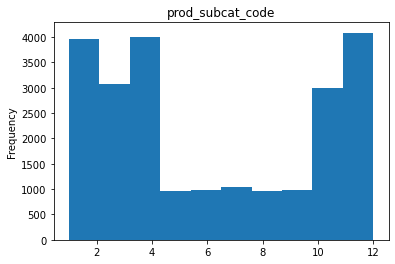

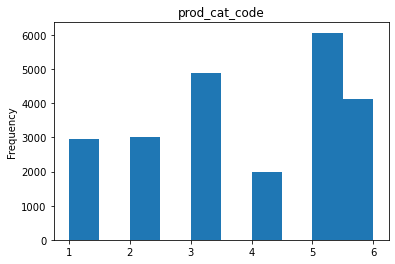

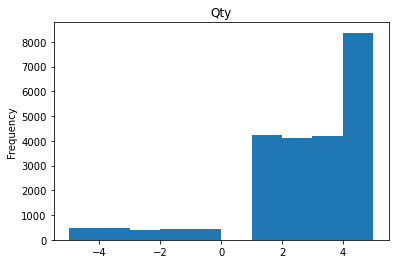

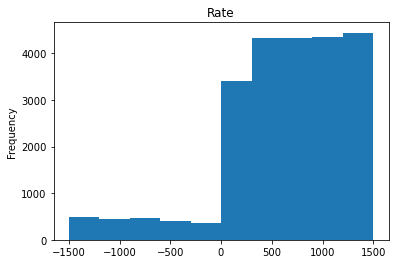

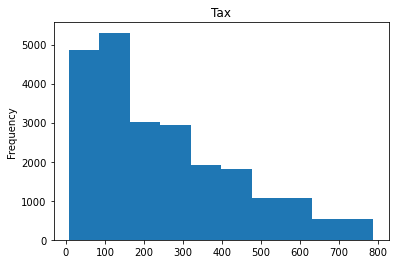

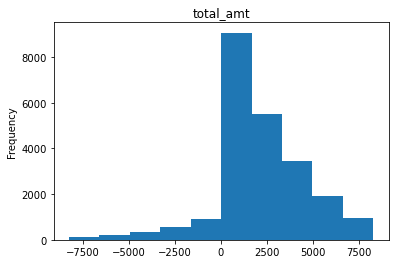

In [13]:
for var in hist_cust.columns:
    hist_cust[var].plot(kind='hist')
    plt.title(var)
    plt.show()

#### 4. Calculate the following information using the merged dataset :
####   a. Time period of the available transaction data
####   b. Count of transactions where the total amount of transaction was negative

In [14]:
# Time period of the available transaction data
trans = pd.Series(customer_final.tran_date.apply(lambda x: x.replace("/", "-")))

In [15]:
trans = pd.to_datetime(trans, format="%d-%m-%Y")

In [16]:
trans.sort_values(inplace = True)

In [18]:
first = trans[trans.size-1]
first

Timestamp('2011-01-25 00:00:00')

In [19]:
last = trans[0]
last

Timestamp('2014-02-28 00:00:00')

In [20]:
last-first

Timedelta('1130 days 00:00:00')

In [21]:
# Count of transactions where the total amount of transaction was negative
negative_tran = customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()
negative_tran

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [22]:
prod_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
prod_gender

,Gender,prod_cat,Qty
0,F,Bags,2362
1,F,Books,7070
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3716
5,F,Home and kitchen,4895
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6476


In [23]:
prod_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [24]:
customer_final.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0


In [25]:
cust_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)

In [26]:
cust_group

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: customer_Id, dtype: int64

In [27]:
percentage = round((cust_group[4.0] / cust_group.sum()) * 100,2)

In [28]:
percentage

10.51

### 7. Which store type sells the maximum products by value and by quantity?

In [29]:
customer_final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)

,Qty,Rate
Store_type,,
e-Shop,22763,5941001
MBR,11194,2953253
Flagship store,11133,2941557
TeleShop,10984,2834420


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [30]:
store_group = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)

In [31]:
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.83,848678.68,789181.06,1616300.08
Books,2488205.85,2496039.20,2545005.06,5293443.93
Clothing,1194423.23,1287686.34,1241834.36,2527193.57
Electronics,2215136.04,2107514.56,1973338.83,4426474.20
Footwear,1234806.56,1112163.72,1235719.29,2637084.71
Home and kitchen,1712567.68,1822403.57,1579702.47,3324319.57


In [32]:
store_group.loc[["Clothing","Electronics"],"Flagship store"]

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: Flagship store, dtype: float64

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [33]:
gender_group = round(customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)

In [34]:
gender_group

Gender,F,M
prod_cat,,
Bags,2077985.65,2046722.99
Books,6164692.23,6645972.77
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5703109.43
Footwear,3202552.99,3014672.05
Home and kitchen,4132177.33,4301075.48


In [35]:
male_earning = gender_group.loc["Electronics","M"]

In [36]:
male_earning

5703109.43

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [34]:
pos_trans = customer_final.loc[customer_final["total_amt"]>0,:]

In [35]:
unique_trans = pos_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_trans.head()

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1


In [36]:
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
unique_trans_count.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [37]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,customer_Id,transaction_id


#### 11. For all customers aged between 25 - 35, find out:
####     a. What was the total amount spent for "Electronics" and "Books" product categories?
####     b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [38]:
# a. What was the total amount spent for "Electronics" and "Books" product categories?
customer_final.DOB = pd.to_datetime(customer_final.DOB, format = "%d-%m-%Y")
DOB = customer_final.DOB

In [39]:
customer_final['age'] = DOB.apply(lambda x: pd.to_datetime('today').year-x.year)

In [40]:
age_barred = customer_final[(customer_final.age>=25) & (customer_final.age<=35)].reset_index(drop=True)
age_barred.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,age
0,51750724947,273420,24-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28
1,51750724947,273420,23-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28
2,25455265351,267750,20-02-2014,12,6,3,1360,428.40,4508.40,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0,34
3,91116291703,268509,20-02-2014,1,2,4,1243,522.06,5494.06,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,31
4,88853694830,268444,20-02-2014,4,4,-3,-80,25.20,-265.20,MBR,Bags,Women,268444,1992-01-02,F,6.0,28


In [41]:
age_catg = age_barred.groupby('prod_cat')['total_amt'].sum().reset_index()
age_catg

,prod_cat,total_amt
0,Bags,1373223.280
1,Books,4330087.255
2,Clothing,2360786.090
3,Electronics,3832189.725
4,Footwear,2221792.560
5,Home and kitchen,2966044.315


In [42]:
age_catg[(age_catg.prod_cat=='Electronics') | (age_catg.prod_cat=='Books')]

,prod_cat,total_amt
1,Books,4330087.255
3,Electronics,3832189.725


In [43]:
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
age_barred.tran_date = age_barred.tran_date.apply(lambda x: x.replace('/', '-'))
age_barred.tran_date = pd.to_datetime(age_barred.tran_date, format='%d-%m-%Y')

In [44]:
date_barred = age_barred[(age_barred.tran_date > pd.to_datetime('01-01-2014', format='%d-%m-%Y')) & 
                         (age_barred.tran_date<pd.to_datetime('01-03-2014', format='%d-%m-%Y'))].reset_index(drop=True)
date_barred.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,age
0,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28
1,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,28
2,25455265351,267750,2014-02-20,12,6,3,1360,428.40,4508.40,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0,34
3,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,31
4,88853694830,268444,2014-02-20,4,4,-3,-80,25.20,-265.20,MBR,Bags,Women,268444,1992-01-02,F,6.0,28


In [45]:
date_barred.total_amt.sum()

821147.6